In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor

In [2]:
df_join = pd.read_excel('../data/data_joined_16-23_no_new_buildings.xlsx')

In [14]:
df_infl = pd.read_excel('../data/constructed/inflation-rate-in-kazakhstan-2028.xlsx', sheet_name='Data')
df_infl['Year'] = pd.to_numeric(df_infl['Year'].str.replace('*',''))
df_infl=df_infl[pd.to_numeric(df_infl.Year)>=2016]

C:\Users\User\AppData\Local\Temp\ipykernel_21100\1026236143.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_infl['Year'] = pd.to_numeric(df_infl['Year'].str.replace('*',''))


NameError: name 'df_join' is not defined

Validation of overall model

In [50]:
tree = DecisionTreeRegressor(criterion='absolute_error', min_samples_split=5)

In [15]:
scores=[]
kf = KFold(n_splits=5)
for year in df_join.YEAR.unique():
            
    x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','Regions_Alatau', 'Regions_Almaly', 'Regions_Almaty', 'Regions_Auezov',
        'Regions_Bostandyq', 'Regions_Jetysu', 'Regions_Medeu',
        'Regions_Nauryzbai', 'Regions_Turksib','YEAR']], df_join[df_join['YEAR']==year]['price']
    kf.get_n_splits(x, y)
    for train_index,test_index in kf.split(x, y):    
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        tree.fit(X_train, y_train)
        scores.append(tree.score(X_test, y_test))

In [64]:
df_join['floor_interaction'] = df_join['floor']*df_join.total_floor

In [69]:
scores=[]
kf = KFold(n_splits=5, shuffle=True)
tree = DecisionTreeRegressor(criterion='squared_error', min_samples_split=5, max_leaf_nodes=32)
for year in [2023]:
            
    x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','Regions_Alatau', 'Regions_Almaly', 'Regions_Almaty', 'Regions_Auezov',
        'floor_interaction','Regions_Bostandyq', 'Regions_Jetysu', 'Regions_Medeu',
        'Regions_Nauryzbai', 'Regions_Turksib','YEAR']], df_join[df_join['YEAR']==year]['price']
    kf.get_n_splits(x, y)
    for train_index,test_index in kf.split(x, y):    
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        tree.fit(X_train, y_train)
        scores.append(tree.score(X_test, y_test))

In [70]:
np.mean(scores)

0.6730070530248629

In [71]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import graphviz 

dot_data = sklearn.tree.export_graphviz(tree, out_file=None, filled=True, feature_names=X_train.columns,  )
graph = graphviz.Source(dot_data)

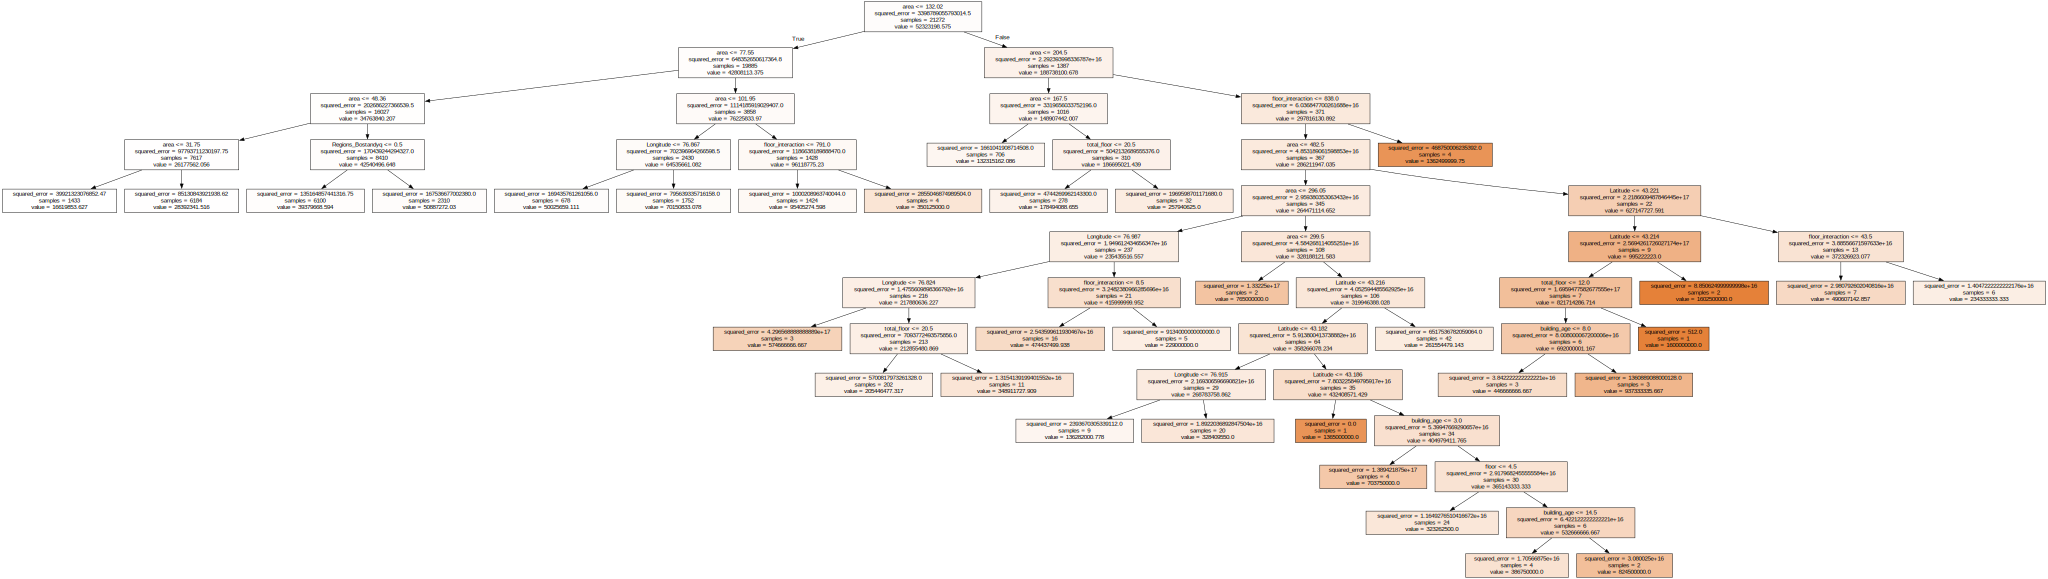

In [72]:
graph

In [16]:
np.array(scores).mean()

0.3073761086918353

In [ ]:
tree = DecisionTreeRegressor(criterion='absolute_error', min_samples_split=5, max_leaf_nodes=16)

In [ ]:
scores=[]
kf = KFold(n_splits=10)
for year in df_join.YEAR.unique():
            
    x, y = df_join[df_join['YEAR']==year][[ 'floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','Regions_Alatau', 'Regions_Almaly', 'Regions_Almaty', 'Regions_Auezov',
        'Regions_Bostandyq', 'Regions_Jetysu', 'Regions_Medeu',
        'Regions_Nauryzbai', 'Regions_Turksib','YEAR']], df_join[df_join['YEAR']==year]['price_adj_per_area']
    kf.get_n_splits(x, y)
    for train_index,test_index in kf.split(x, y):    
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        tree.fit(X_train, y_train)
        scores.append(tree.score(X_test, y_test))

In [ ]:
sample_means = df_join.groupby('YEAR', as_index=False).apply(lambda x: x.sample(20)).groupby('YEAR')['price_adj_per_area'].mean()


In [33]:
performance_measure = dict()
kf = KFold(n_splits=10,shuffle=True)
for max_leaf_nodes in range(2, 50, 1):
    tree = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=5, max_leaf_nodes=max_leaf_nodes)
    scores=[]
    for year in df_join.YEAR.unique():
                
        x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','Regions_Alatau', 'Regions_Almaly', 'Regions_Almaty', 'Regions_Auezov',
            'Regions_Bostandyq', 'Regions_Jetysu', 'Regions_Medeu',
            'Regions_Nauryzbai', 'Regions_Turksib','YEAR']], df_join[df_join['YEAR']==year]['price']
        kf.get_n_splits(x, y)
        for train_index,test_index in kf.split(x, y):    
            X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
            tree.fit(X_train, y_train)
            scores.append(tree.score(X_test, y_test))

    performance_measure[max_leaf_nodes] = np.array(scores).mean() 

In [36]:
performance_measure = dict()
kf = KFold(n_splits=5,shuffle=True)


scores=[]
mses = []
maes = []
mapes = []
for year in df_join.YEAR.unique():
    tree = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=5, max_leaf_nodes=11)
    x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','YEAR']], df_join[df_join['YEAR']==year]['price']
    kf.get_n_splits(x, y)
    scores_iter=[]
    mses_iter = []
    maes_iter = []
    mapes_iter = []
    for train_index,test_index in kf.split(x, y):    
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        tree.fit(X_train, y_train)

        #mathematical trick see beyond what you see

        scores_iter.append(tree.score(X_test, y_test))
        y_pred = tree.predict(X_test)
        mses_iter.append(mean_squared_error(y_pred, y_test))
        maes_iter.append(mean_absolute_error(y_pred, y_test))
        mapes_iter.append(mean_absolute_percentage_error(y_pred, y_test))
    scores.append(np.mean(scores_iter))
    mses.append(np.mean(mses_iter))
    maes.append(np.mean(maes_iter))
    mapes.append(np.mean(mapes_iter))

print('TIMESERIES CV PERFORMANCE')
print('R^2', np.mean(scores))
print('MSE', np.mean(mses))
print('RMSE', np.mean(mses)**0.5)
print('MAE', np.mean(maes))
print('MAPE', np.mean(mapes)) 

TIMESERIES CV PERFORMANCE
R^2 0.5855061550398324
MSE 579572459949086.0
RMSE 24074311.204042494
MAE 10178768.729200227
MAPE 0.2469947706631222


In [34]:
max(performance_measure, key=performance_measure.get)

11

In [35]:
performance_measure[max(performance_measure, key=performance_measure.get)]

0.588424960672692

In [87]:
performance_measure

{2: -0.053908320504698425,
 3: 0.1616475257789399,
 4: -0.9886463881624353,
 5: 0.40858200018093066,
 6: 0.45084598550215754,
 7: -0.45220787816753416,
 8: 0.49083308194685105,
 9: 0.47395606552847375,
 10: 0.2880736327254165,
 11: 0.035410969852005626,
 12: 0.213919334157052,
 13: 0.34994608871098903,
 14: 0.16100696133244824,
 15: 0.29936430281642856,
 16: -1.6243685974321145,
 17: -2.6949484448134102,
 18: -2.455090819628128,
 19: 0.31124673295422606,
 20: 0.5432125862470578,
 21: 0.47582042267751606,
 22: -2.7877860576535705,
 23: 0.4134183431541668,
 24: 0.17682116642293227,
 25: 0.13400139816823398,
 26: -1.181375039935755,
 27: 0.3424863024305846,
 28: 0.3069096842234494,
 29: 0.30800283829721276,
 30: 0.3689195765767246,
 31: 0.2312162615111714,
 32: 0.04445039662020178,
 33: -2.405809927256797,
 34: 0.5447116341589786,
 35: -2.5742937497270826,
 36: 0.5616725031039478,
 37: 0.5533837043529151,
 38: 0.5213320369589061,
 39: 0.49922311636273686,
 40: -0.9350701605498317,
 41: -0

Random Forest

In [27]:
performance_measure = dict()
kf = KFold(n_splits=10,shuffle=True)
for max_leaf_nodes in range(2, 20, 1):
    tree = RandomForestRegressor(n_estimators=100 ,criterion='squared_error', min_samples_leaf=5, max_leaf_nodes=max_leaf_nodes)
    scores=[]
    for year in df_join.YEAR.unique():
                
        x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','YEAR']], df_join[df_join['YEAR']==year]['price']
        kf.get_n_splits(x, y)
        for train_index,test_index in kf.split(x, y):    
            X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
            tree.fit(X_train, y_train)
            scores.append(tree.score(X_test, y_test))

    performance_measure[max_leaf_nodes] = np.array(scores).mean() 

In [30]:
performance_measure = dict()
kf = KFold(n_splits=5,shuffle=True)


scores=[]
mses = []
maes = []
mapes = []
for year in df_join.YEAR.unique():
    tree = RandomForestRegressor(criterion='squared_error', min_samples_leaf=5, max_leaf_nodes=16)
    x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','YEAR']], df_join[df_join['YEAR']==year]['price']
    kf.get_n_splits(x, y)
    scores_iter=[]
    mses_iter = []
    maes_iter = []
    mapes_iter = []
    for train_index,test_index in kf.split(x, y):    
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        tree.fit(X_train, y_train)

        #mathematical trick see beyond what you see

        scores_iter.append(tree.score(X_test, y_test))
        y_pred = tree.predict(X_test)
        mses_iter.append(mean_squared_error(y_pred, y_test))
        maes_iter.append(mean_absolute_error(y_pred, y_test))
        mapes_iter.append(mean_absolute_percentage_error(y_pred, y_test))
    scores.append(np.mean(scores_iter))
    mses.append(np.mean(mses_iter))
    maes.append(np.mean(maes_iter))
    mapes.append(np.mean(mapes_iter))

print('TIMESERIES CV PERFORMANCE')
print('R^2', np.mean(scores))
print('MSE', np.mean(mses))
print('RMSE', np.mean(mses)**0.5)
print('MAE', np.mean(maes))
print('MAPE', np.mean(mapes)) 

TIMESERIES CV PERFORMANCE
R^2 0.6558574271880167
MSE 519324096173822.6
RMSE 22788683.511204034
MAE 9428250.693048798
MAPE 0.2293776222937195


In [28]:
print('Best estimator value', max(performance_measure, key=performance_measure.get))
print('R^2 performed', performance_measure[max(performance_measure, key=performance_measure.get)])

Best estimator value 16
R^2 performed 0.5510536918662733


НАЧНИ ОТСЮДА

Gradient Boosting


In [23]:
performance_measure = dict()
kf = KFold(n_splits=5,shuffle=True)
for tree_count in range(200, 1000, 100): #настраивай вот эти слева и вон тот справа 
    tree = GradientBoostingRegressor(n_estimators=tree_count ,criterion='squared_error', min_samples_leaf=5, max_leaf_nodes=6) # да вот этот
    scores=[]
    for year in df_join.YEAR.unique():
                
        x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','Regions_Alatau', 'Regions_Almaly', 'Regions_Almaty', 'Regions_Auezov',
            'Regions_Bostandyq', 'Regions_Jetysu', 'Regions_Medeu',
            'Regions_Nauryzbai', 'Regions_Turksib','YEAR']], df_join[df_join['YEAR']==year]['price']
        kf.get_n_splits(x, y)
        for train_index,test_index in kf.split(x, y):    
            X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
            tree.fit(X_train, y_train)
            scores.append(tree.score(X_test, y_test))

    performance_measure[tree_count] = np.array(scores).mean() 

KeyboardInterrupt: 

In [24]:
print('Best estimator value', max(performance_measure, key=performance_measure.get))
print('R^2 performed', performance_measure[max(performance_measure, key=performance_measure.get)])

Best estimator value 200
R^2 performed 0.6858118858085701


In [32]:
performance_measure = dict()
kf = KFold(n_splits=5,shuffle=True)


scores=[]
mses = []
maes = []
mapes = []
for year in df_join.YEAR.unique():
    tree = GradientBoostingRegressor(criterion='squared_error', min_samples_leaf=5, max_leaf_nodes=6, n_estimators=40)
    x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','YEAR']], df_join[df_join['YEAR']==year]['price']
    kf.get_n_splits(x, y)
    scores_iter=[]
    mses_iter = []
    maes_iter = []
    mapes_iter = []
    for train_index,test_index in kf.split(x, y):    
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        tree.fit(X_train, y_train)

        #mathematical trick see beyond what you see

        scores_iter.append(tree.score(X_test, y_test))
        y_pred = tree.predict(X_test)
        mses_iter.append(mean_squared_error(y_pred, y_test))
        maes_iter.append(mean_absolute_error(y_pred, y_test))
        mapes_iter.append(mean_absolute_percentage_error(y_pred, y_test))
    scores.append(np.mean(scores_iter))
    mses.append(np.mean(mses_iter))
    maes.append(np.mean(maes_iter))
    mapes.append(np.mean(mapes_iter))

print('TIMESERIES CV PERFORMANCE')
print('R^2', np.mean(scores))
print('MSE', np.mean(mses))
print('RMSE', np.mean(mses)**0.5)
print('MAE', np.mean(maes))
print('MAPE', np.mean(mapes)) 

TIMESERIES CV PERFORMANCE
R^2 0.7156393867453958
MSE 455946586883039.06
RMSE 21352905.818249635
MAE 8203173.351156605
MAPE 0.19367044690178115


Ada Boost

In [96]:
list(range(10, 100, 10))

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [7]:
performance_measure = dict()
kf = KFold(n_splits=10,shuffle=True)
for tree_count in range(10, 25, 1): #настраивай вот эти слева и вон тот справа 
    tree = AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=5, max_leaf_nodes=6),n_estimators=tree_count ) # да вот этот
    scores=[]
    for year in df_join.YEAR.unique():
                
        x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','Regions_Alatau', 'Regions_Almaly', 'Regions_Almaty', 'Regions_Auezov',
            'Regions_Bostandyq', 'Regions_Jetysu', 'Regions_Medeu',
            'Regions_Nauryzbai', 'Regions_Turksib','YEAR']], df_join[df_join['YEAR']==year]['price']
        kf.get_n_splits(x, y)
        for train_index,test_index in kf.split(x, y):    
            X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
            tree.fit(X_train, y_train)
            scores.append(tree.score(X_test, y_test))

    performance_measure[tree_count] = np.array(scores).mean() 

In [9]:
print('Best estimator value', max(performance_measure, key=performance_measure.get))
print('R^2 performed', performance_measure[max(performance_measure, key=performance_measure.get)])

Best estimator value 22
R^2 performed 0.39798866497842855


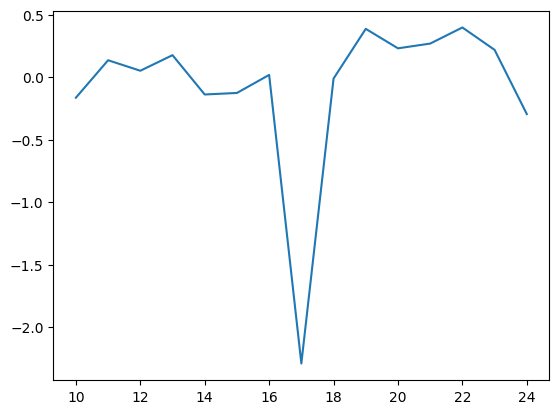

In [15]:
plt.plot(pd.DataFrame.from_dict(performance_measure, orient='index', columns=['R^2']))

In [23]:
performance_measure = dict()
kf = KFold(n_splits=5,shuffle=True)


scores=[]
mses = []
maes = []
mapes = []
for year in df_join.YEAR.unique():
    tree = AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=3, max_leaf_nodes=30), n_estimators=20)
    x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','YEAR']], df_join[df_join['YEAR']==year]['price']
    kf.get_n_splits(x, y)
    scores_iter=[]
    mses_iter = []
    maes_iter = []
    mapes_iter = []
    for train_index,test_index in kf.split(x, y):    
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        tree.fit(X_train, y_train)

        #mathematical trick see beyond what you see

        scores_iter.append(tree.score(X_test, y_test))
        y_pred = tree.predict(X_test)
        mses_iter.append(mean_squared_error(y_pred, y_test))
        maes_iter.append(mean_absolute_error(y_pred, y_test))
        mapes_iter.append(mean_absolute_percentage_error(y_pred, y_test))
    scores.append(np.mean(scores_iter))
    mses.append(np.mean(mses_iter))
    maes.append(np.mean(maes_iter))
    mapes.append(np.mean(mapes_iter))

print('TIMESERIES CV PERFORMANCE')
print('R^2', np.mean(scores))
print('MSE', np.mean(mses))
print('RMSE', np.mean(mses)**0.5)
print('MAE', np.mean(maes))
print('MAPE', np.mean(mapes)) 

TIMESERIES CV PERFORMANCE
R^2 0.6425681884254164
MSE 509980179186465.25
RMSE 22582740.73682079
MAE 10324358.60141979
MAPE 0.23608490603407126


In [43]:
len('11300938580')

11

In [42]:
len(str(int(2.759e10)))

11

Bagging

In [ ]:
performance_measure = dict()
kf = KFold(n_splits=10,shuffle=True)
for max_leaf_nodes in range(2, 50, 1):
    tree = BaggingRegressor(DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=5, max_leaf_nodes=max_leaf_nodes), n_estimators=10)
    scores=[]
    for year in df_join.YEAR.unique():
                
        x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','Regions_Alatau', 'Regions_Almaly', 'Regions_Almaty', 'Regions_Auezov',
            'Regions_Bostandyq', 'Regions_Jetysu', 'Regions_Medeu',
            'Regions_Nauryzbai', 'Regions_Turksib','YEAR']], df_join[df_join['YEAR']==year]['price']
        kf.get_n_splits(x, y)
        for train_index,test_index in kf.split(x, y):    
            X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
            tree.fit(X_train, y_train)
            scores.append(tree.score(X_test, y_test))

    performance_measure[max_leaf_nodes] = np.array(scores).mean() 

print('Best estimator value', max(performance_measure, key=performance_measure.get))
print('R^2 performed', performance_measure[max(performance_measure, key=performance_measure.get)])

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

Best Bagging

In [14]:
performance_measure = dict()
kf = KFold(n_splits=5,shuffle=True)


scores=[]
mses = []
maes = []
mapes = []
for year in df_join.YEAR.unique():
    tree = BaggingRegressor(DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=3, max_leaf_nodes=36
    ), n_estimators=10)
    x, y = df_join[df_join['YEAR']==year][[ 'area','floor', 'building_age', 'total_floor', 'Latitude', 'Longitude','Regions_Alatau', 'Regions_Almaly', 'Regions_Almaty', 'Regions_Auezov',
        'Regions_Bostandyq', 'Regions_Jetysu', 'Regions_Medeu',
        'Regions_Nauryzbai', 'Regions_Turksib','YEAR']], df_join[df_join['YEAR']==year]['price']
    kf.get_n_splits(x, y)
    scores_iter=[]
    mses_iter = []
    maes_iter = []
    mapes_iter = []
    for train_index,test_index in kf.split(x, y):    
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        tree.fit(X_train, y_train)

        #mathematical trick see beyond what you see

        scores_iter.append(tree.score(X_test, y_test))
        y_pred = tree.predict(X_test)
        mses_iter.append(mean_squared_error(y_pred, y_test))
        maes_iter.append(mean_absolute_error(y_pred, y_test))
        mapes_iter.append(mean_absolute_percentage_error(y_pred, y_test))
    scores.append(np.mean(scores_iter))
    mses.append(np.mean(mses_iter))
    maes.append(np.mean(maes_iter))
    mapes.append(np.mean(mapes_iter))

print('TIMESERIES CV PERFORMANCE')
print('R^2', np.mean(scores))
print('MSE', np.mean(mses))
print('RMSE', np.mean(mses)**0.5)
print('MAE', np.mean(maes))
print('MAPE', np.mean(mapes)) 

TIMESERIES CV PERFORMANCE
R^2 0.7224484413252733
MSE 439407853788287.1
RMSE 20962057.47984408
MAE 8147583.106507335
MAPE 0.19366681694524782
